# PROBLEM STATEMENT
Task 1:- Prepare a complete data analysis report on the given data.

Task 2:-a) Create a robust machine learning algorithm to accurately predict the price of the house given the various factors across the market.      
            b) Determine the relationship between the house features and how the price varies based on this.

Task3:- Come up with suggestions for the customer to buy the house according to the area, price and other requirements.

In [1]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
data=pd.read_csv('data.csv')
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

## Basic checks

Here I check a subset of data by the head method and check if there is any missing data using the info method. 

In [3]:
#check the num of rows and columns
data.shape

(1460, 81)

In [4]:
#print first 5 rows n columns
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
#print last 5 rows n columns
data.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [6]:
data.head(pd.set_option('display.max_rows',None))

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    11924   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
13      14          20       RL         91.0    10652   Pave   NaN      IR1   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
15      16          45       RM         51.0     6120   Pave   NaN      Reg   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
18      19          20       RL         66.0    13695   Pave   NaN      Reg   
19      20          20       RL         70.0     7560   Pave   NaN      Reg   
20      21          60       RL        101.0    14215   Pave   NaN      IR1   
21      22          45       RM         57.0     7449   Pave  Grvl      Reg   
22      23          20       RL         75.0     9742   Pave   NaN      Reg   
23      24         120       RM         44.0     4224   Pave   NaN      Reg   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
25      26          20       RL        110.0    14230   Pave   NaN      Reg   
26      27          20       RL         60.0     7200   Pave   NaN      Reg   
27      28          20       RL         98.0    11478   Pave   NaN      Reg   
28      29          20       RL         47.0    16321   Pave   NaN      IR1   
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
30      31          70  C (all)         50.0     8500   Pave  Pave      Reg   
31      32          20       RL          NaN     8544   Pave   NaN      IR1   
32      33          20       RL         85.0    11049   Pave   NaN      Reg   
33      34          20       RL         70.0    10552   Pave   NaN      IR1   
34      35         120       RL         60.0     7313   Pave   NaN      Reg   
35      36          60       RL        108.0    13418   Pave   NaN      Reg   
36      37          20       RL        112.0    10859   Pave   NaN      Reg   
37      38          20       RL         74.0     8532   Pave   NaN      Reg   
38      39          20       RL         68.0     7922   Pave   NaN      Reg   
39      40          90       RL         65.0     6040   Pave   NaN      Reg   
40      41          20       RL         84.0     8658   Pave   NaN      Reg   
41      42          20       RL        115.0    16905   Pave   NaN      Reg   
42      43          85       RL          NaN     9180   Pave   NaN      IR1   
43      44          20       RL          NaN     9200   Pave   NaN      IR1   
44      45          20       RL         70.0     7945   Pave   NaN      Reg   
45      46         120       RL         61.0     7658   Pave   NaN      Reg   
46      47          50       RL         48.0    12822   Pave   NaN      IR1   
47      48          20       FV         84.0    11096   Pave   NaN      Reg   
48      49         190       RM         33.0     4456   Pave   NaN      Reg   
49      50          20       RL         66.0     7742   Pa

In [7]:
#print columns
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
#check for datatypes
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [9]:
#check info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
#statistical analysis
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [11]:
#check for null values
data.isnull().sum(pd.set_option('display.max_rows',None))

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

## Data Preprocessing

In [12]:
data.isnull().sum()/len(data)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [13]:
#we are handling only features which have less than 50% missing values

<AxesSubplot:>

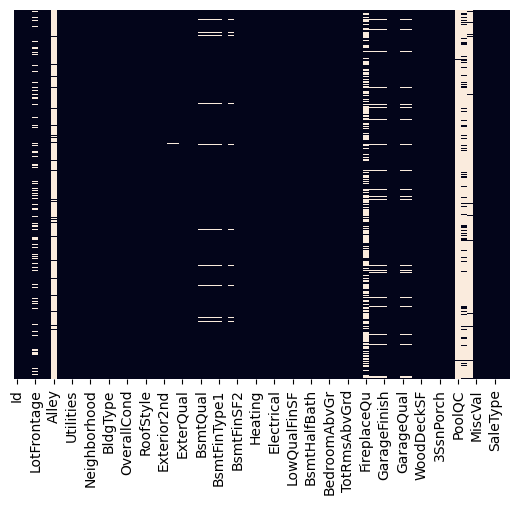

In [14]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [15]:
num_columns=data.select_dtypes(exclude='O').columns
num_columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [16]:
cat_columns=data.select_dtypes(include='O').columns
cat_columns                              

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

## Handling missing values in LotFrontage  

In [17]:
data.loc[data['LotFrontage'].isnull()==True]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
31      32          20       RL          NaN     8544   Pave   NaN      IR1   
42      43          85       RL          NaN     9180   Pave   NaN      IR1   
43      44          20       RL          NaN     9200   Pave   NaN      IR1   
50      51          60       RL          NaN    13869   Pave   NaN      IR2   
64      65          60       RL          NaN     9375   Pave   NaN      Reg   
66      67          20       RL          NaN    19900   Pave   NaN      Reg   
76      77          20       RL          NaN     8475   Pave   NaN      IR1   
84      85          80       RL          NaN     8530   Pave   NaN      IR1   
95      96          60       RL          NaN     9765   Pave   NaN      IR2   
100    101          20       RL          NaN    10603   Pave   NaN      IR1   
104    105          50       RM          NaN     7758   Pave   NaN      Reg   
111    112          80       RL          NaN     7750   Pave   NaN      IR1   
113    114          20       RL          NaN    21000   Pave   NaN      Reg   
116    117          20       RL          NaN    11616   Pave   NaN      Reg   
120    121          80       RL          NaN    21453   Pave   NaN      IR1   
126    127         120       RL          NaN     4928   Pave   NaN      IR1   
131    132          60       RL          NaN    12224   Pave   NaN      IR1   
133    134          20       RL          NaN     6853   Pave   NaN      IR1   
136    137          20       RL          NaN    10355   Pave   NaN      IR1   
147    148          60       RL          NaN     9505   Pave   NaN      IR1   
149    150          50       RM          NaN     6240   Pave   NaN      Reg   
152    153          60       RL          NaN    14803   Pave   NaN      IR1   
153    154          20       RL          NaN    13500   Pave   NaN      Reg   
160    161          20       RL          NaN    11120   Pave   NaN      IR1   
166    167          20       RL          NaN    10708   Pave   NaN      IR1   
169    170          20       RL          NaN    16669   Pave   NaN      IR1   
170    171          50       RM          NaN    12358   Pave   NaN      IR1   
177    178          50       RL          NaN    13650   Pave   NaN      Reg   
180    181         160       FV          NaN     2117   Pave   NaN      Reg   
186    187          80       RL          NaN     9947   Pave   NaN      IR1   
191    192          60       RL          NaN     7472   Pave   NaN      IR1   
203    204         120       RM          NaN     4438   Pave   NaN      Reg   
207    208          20       RL          NaN    12493   Pave   NaN      IR1   
208    209          60       RL          NaN    14364   Pave   NaN      IR1   
214    215          60       RL          NaN    10900   Pave   NaN      IR1   
218    219          50       RL          NaN    15660   Pave   NaN      IR1   
221    222          60       RL          NaN     8068   Pave   NaN      IR1   
234    235          60       RL          NaN     7851   Pave   NaN      Reg   
237    238          60       RL          NaN     9453   Pave   NaN      IR1   
244    245          60       RL          NaN     8880   Pave   NaN      IR1   
249    250          50       RL          NaN   159000   Pave   NaN      IR2   
269    270          20       RL          NaN     7917   Pave   NaN      IR1   
287    288          20       RL          NaN     8125   Pave   NaN      IR1   
288    289          20       RL          NaN     9819   Pave   NaN      IR1   
293    294          60       RL          NaN    16659   Pa

<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

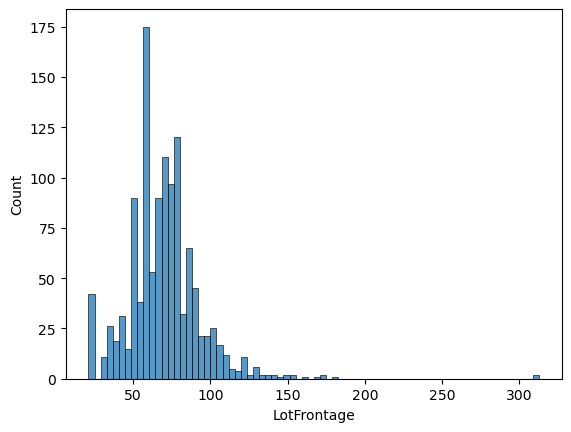

In [18]:
sns.histplot(x='LotFrontage',data=data)

In [19]:
data['LotFrontage'].median()

69.0

In [20]:
data.loc[data['LotFrontage'].isnull()==True,'LotFrontage']=69

In [21]:
data.loc[data['LotFrontage'].isnull()==True]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

## Handling missing values in BsmtQual

<AxesSubplot:xlabel='BsmtQual', ylabel='count'>

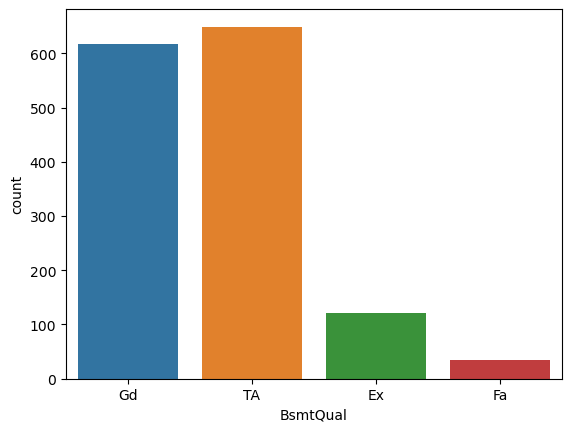

In [22]:
sns.countplot(x='BsmtQual',data=data)

In [23]:
data.value_counts('BsmtQual')

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
dtype: int64

In [24]:
data.loc[data['BsmtQual'].isnull()==True,'BsmtQual']='TA'

In [25]:
data.loc[data['BsmtQual'].isnull()==True]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

## Handling missing values in BsmtCond

<AxesSubplot:xlabel='BsmtCond', ylabel='count'>

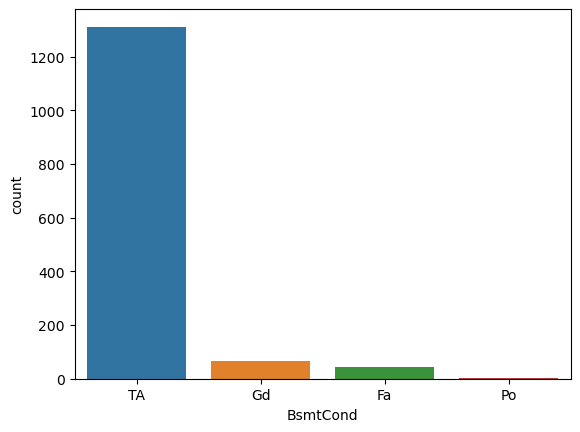

In [26]:
sns.countplot(data=data,x='BsmtCond')

In [27]:
data.value_counts('BsmtCond')

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
dtype: int64

In [28]:
data['BsmtCond'].mode()

0    TA
Name: BsmtCond, dtype: object

In [29]:
data.loc[data['BsmtCond'].isnull()==True,'BsmtCond']='TA'

In [30]:
data.loc[data['BsmtCond'].isnull()==True]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

## Handling missing values in MasVnrType

<AxesSubplot:xlabel='MasVnrType', ylabel='count'>

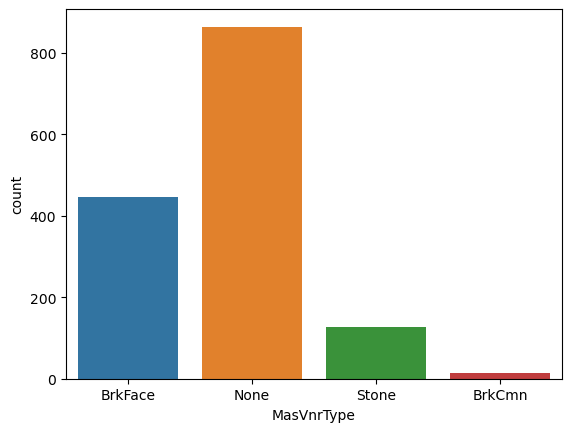

In [31]:
sns.countplot(data=data,x='MasVnrType')

In [32]:
data.value_counts('MasVnrType')

MasVnrType
None       864
BrkFace    445
Stone      128
BrkCmn      15
dtype: int64

In [33]:
data['MasVnrType'].mode()

0    None
Name: MasVnrType, dtype: object

In [34]:
data.loc[data['MasVnrType'].isnull()==True,'MasVnrType']='None'

In [35]:
data.loc[data['MasVnrType'].isnull()==True]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

## Handling missing values in MasVnrArea

<AxesSubplot:xlabel='MasVnrArea', ylabel='Count'>

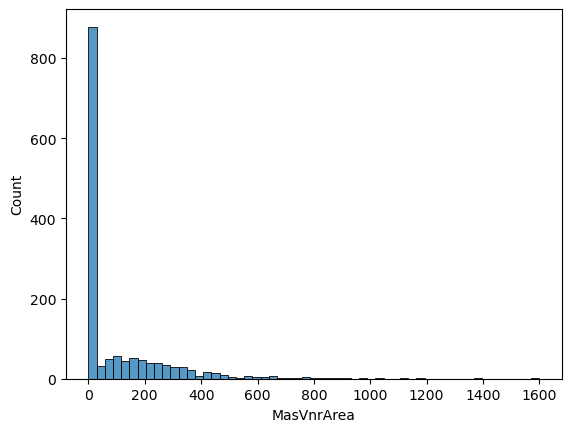

In [36]:
sns.histplot(data=data,x='MasVnrArea')

In [37]:
data['MasVnrArea'].median()

0.0

In [38]:
data.loc[data['MasVnrArea'].isnull()==True,'MasVnrArea']=0

In [39]:
data.loc[data['MasVnrArea'].isnull()==True]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

## Handling missing values in BsmtExposure

<AxesSubplot:xlabel='BsmtExposure', ylabel='count'>

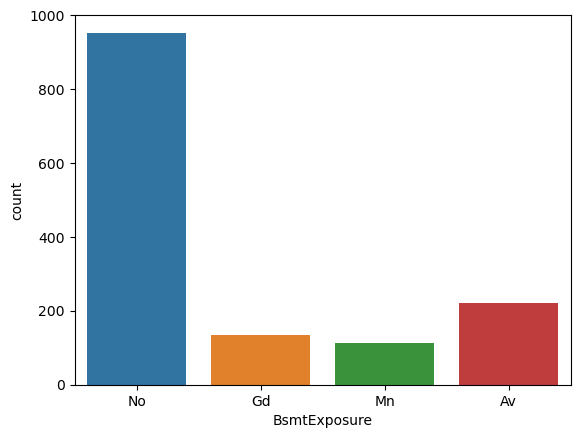

In [40]:
sns.countplot(data=data,x='BsmtExposure')

In [41]:
data['BsmtExposure'].mode()

0    No
Name: BsmtExposure, dtype: object

In [42]:
data.loc[data['BsmtExposure'].isnull()==True,'BsmtExposure']='No'

In [43]:
data.loc[data['BsmtExposure'].isnull()==True]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

## Handling missing values in BsmtFinType1

<AxesSubplot:xlabel='BsmtFinType1', ylabel='count'>

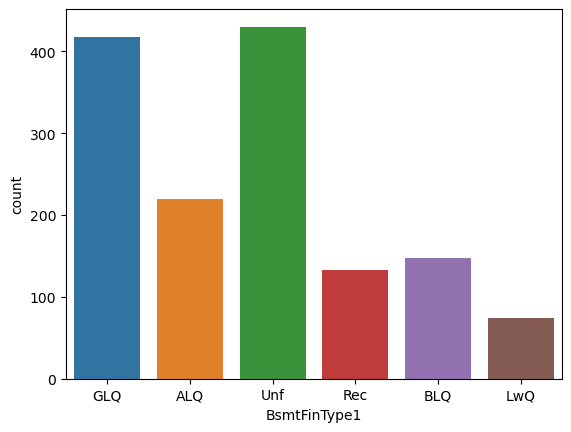

In [44]:
sns.countplot(data=data,x='BsmtFinType1')

In [45]:
data['BsmtFinType1'].mode()

0    Unf
Name: BsmtFinType1, dtype: object

In [46]:
data.loc[data['BsmtFinType1'].isnull()==True,'BsmtFinType1']='Unf'

In [47]:
data.loc[data['BsmtFinType1'].isnull()==True]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

## Handling missing values in BsmtFinType2

<AxesSubplot:xlabel='BsmtFinType2', ylabel='count'>

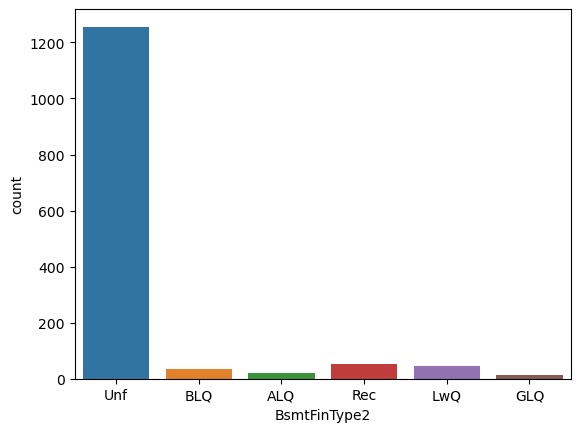

In [48]:
sns.countplot(data=data,x='BsmtFinType2')

In [49]:
data['BsmtFinType2'].mode()

0    Unf
Name: BsmtFinType2, dtype: object

In [50]:
data.loc[data['BsmtFinType2'].isnull()==True,'BsmtFinType2']='Unf'

In [51]:
data.loc[data['BsmtFinType1'].isnull()==True]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

## Handling missing values in FireplaceQu

<AxesSubplot:xlabel='FireplaceQu', ylabel='count'>

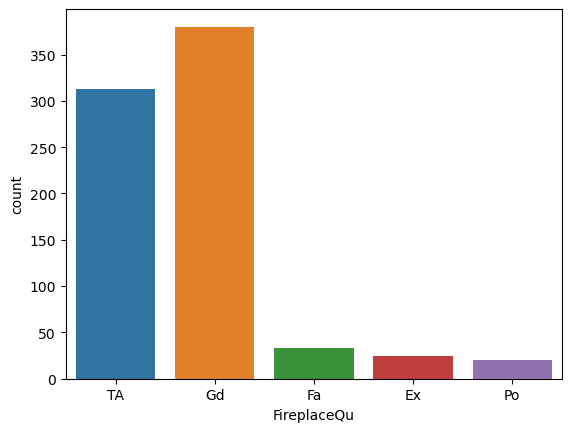

In [52]:
sns.countplot(data=data,x='FireplaceQu')

In [53]:
data['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

In [54]:
data.loc[data['FireplaceQu'].isnull()==True,'FireplaceQu']='Gd'

In [55]:
data.loc[data['FireplaceQu'].isnull()==True]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

In [56]:
## Handling missing values in GarageType

<AxesSubplot:xlabel='GarageType', ylabel='count'>

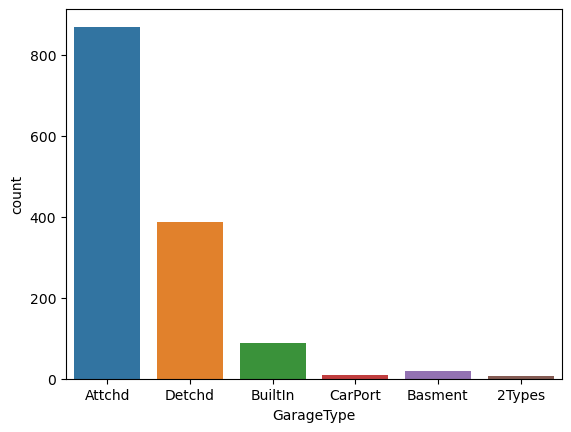

In [57]:
sns.countplot(data=data,x='GarageType')

In [58]:
data['GarageType'].mode()

0    Attchd
Name: GarageType, dtype: object

In [59]:
data.loc[data['GarageType'].isnull()==True,'GarageType']='Attchd'

In [60]:
data.loc[data['GarageType'].isnull()==True]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

In [61]:
## Handling missing values in GarageFinish

<AxesSubplot:xlabel='GarageFinish', ylabel='count'>

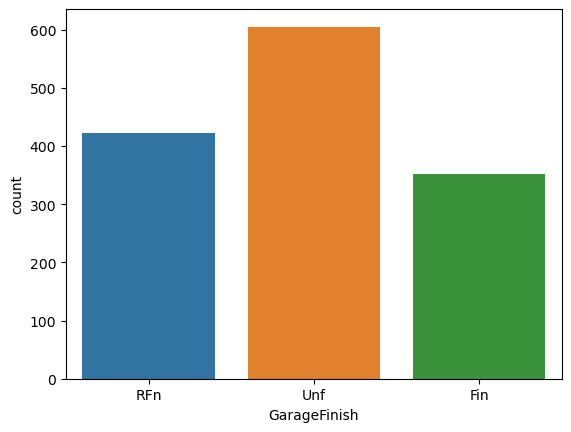

In [62]:
sns.countplot(data=data,x='GarageFinish')

In [63]:
data['GarageFinish'].mode()

0    Unf
Name: GarageFinish, dtype: object

In [64]:
data.loc[data['GarageFinish'].isnull()==True,'GarageFinish']='Unf'

In [65]:
data.loc[data['GarageFinish'].isnull()==True]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

In [66]:
## Handling missing values in GarageQual

<AxesSubplot:xlabel='GarageQual', ylabel='count'>

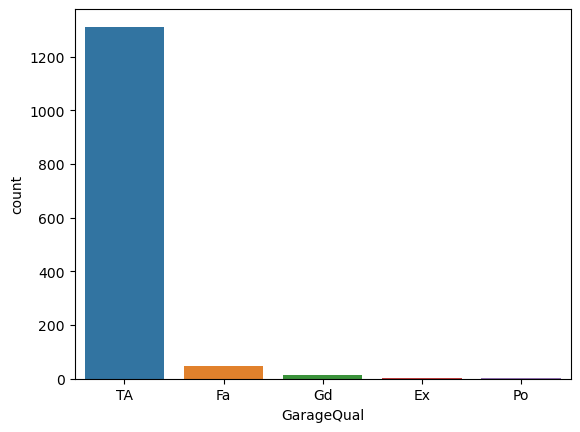

In [67]:
sns.countplot(data=data,x='GarageQual')

In [68]:
data['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

In [69]:
data.loc[data['GarageQual'].isnull()==True,'GarageQual']='TA'

In [70]:
data.loc[data['GarageQual'].isnull()==True]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

In [71]:
## Handling missing values in GarageCond

<AxesSubplot:xlabel='GarageCond', ylabel='count'>

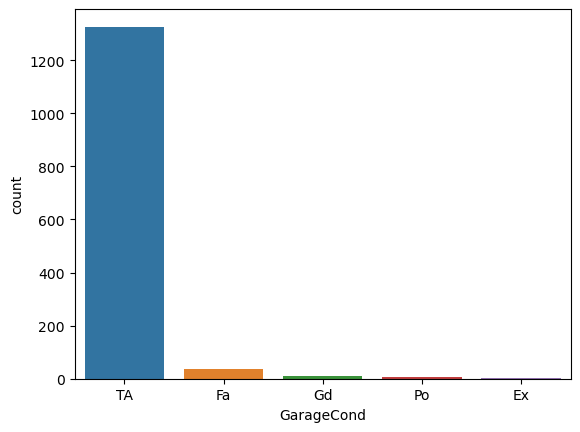

In [72]:
sns.countplot(data=data,x='GarageCond')

In [73]:
data['GarageCond'].mode()

0    TA
Name: GarageCond, dtype: object

In [74]:
data.loc[data['GarageCond'].isnull()==True,'GarageCond']='TA'

In [75]:
data.loc[data['GarageCond'].isnull()==True]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

## Handling missing values in GarageYrBlt

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Count'>

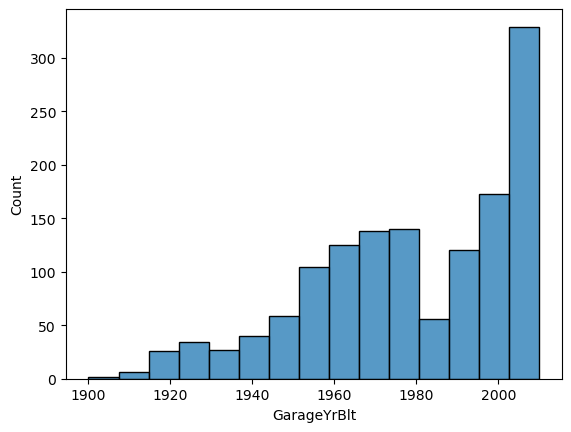

In [76]:
sns.histplot(data=data,x='GarageYrBlt')

In [77]:
data['GarageYrBlt'].median()

1980.0

In [78]:
data.loc[data['GarageYrBlt'].isnull()==True,'GarageYrBlt']=1980

In [79]:
data.loc[data['GarageYrBlt'].isnull()==True]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

In [80]:
#check for duplicated rows
data.duplicated().sum()

0

### label encoding

In [81]:
data1=data.copy()

In [82]:
cat_columns=data.select_dtypes(include='O').columns
cat_columns                   

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [83]:
num_columns=data.select_dtypes(exclude='O').columns
num_columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [84]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

In [85]:
data1[cat_columns]=data1[cat_columns].apply(lc.fit_transform)

In [86]:
data1.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60         3         65.0     8450       1      2         3   
1   2          20         3         80.0     9600       1      2         3   
2   3          60         3         68.0    11250       1      2         0   
3   4          70         3         60.0     9550       1      2         0   
4   5          60         3         84.0    14260       1      2         0   

   LandContour  Utilities  ...  PoolArea  PoolQC  Fence  MiscFeature  MiscVal  \
0            3          0  ...         0       3      4            4        0   
1            3          0  ...         0       3      4            4        0   
2            3          0  ...         0       3      4            4        0   
3            3          0  ...         0       3      4            4        0   
4            3          0  ...         0       3      4            4        0   

   MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       2    2008         8              4     208500  
1       5    2007         8              4     181500  
2       9    2008         8              4     223500  
3       2    2006         8              0     140000  
4      12    2008         8              4     250000  

[5 rows x 81 columns]

In [87]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [88]:
## Scaling

In [89]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [90]:
data1[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
 'GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','ScreenPorch',]]=scale.fit_transform(data1[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
 'GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','ScreenPorch']])

In [91]:
#checking the duplicated rows
data.duplicated().sum()

0

In [92]:
## Saving the preprocessed data
data1.to_csv('Preprocessed_data.csv')

In [93]:
# Loading data
Preprocessed_data=pd.read_csv('Preprocessed_data.csv')
Preprocessed_data

Unnamed: 0    Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  \
0              0     1          60         3     0.150685  0.033420       1   
1              1     2          20         3     0.202055  0.038795       1   
2              2     3          60         3     0.160959  0.046507       1   
3              3     4          70         3     0.133562  0.038561       1   
4              4     5          60         3     0.215753  0.060576       1   
5              5     6          50         3     0.219178  0.059899       1   
6              6     7          20         3     0.184932  0.041057       1   
7              7     8          60         3     0.164384  0.042450       1   
8              8     9          50         4     0.102740  0.022529       1   
9              9    10         190         3     0.099315  0.028605       1   
10            10    11          20         3     0.167808  0.046274       1   
11            11    12          60         3     0.219178  0.049658       1   
12            12    13          20         3     0.164384  0.054537       1   
13            13    14          20         3     0.239726  0.043712       1   
14            14    15          20         3     0.164384  0.044965       1   
15            15    16          45         4     0.102740  0.022529       1   
16            16    17          20         3     0.164384  0.046465       1   
17            17    18          90         3     0.174658  0.044362       1   
18            18    19          20         3     0.154110  0.057935       1   
19            19    20          20         3     0.167808  0.029260       1   
20            20    21          60         3     0.273973  0.060366       1   
21            21    22          45         4     0.123288  0.028741       1   
22            22    23          20         3     0.184932  0.039459       1   
23            23    24         120         4     0.078767  0.013667       1   
24            24    25          20         3     0.164384  0.032466       1   
25            25    26          20         3     0.304795  0.060436       1   
26            26    27          20         3     0.133562  0.027577       1   
27            27    28          20         3     0.263699  0.047573       1   
28            28    29          20         3     0.089041  0.070210       1   
29            29    30          30         4     0.133562  0.023483       1   
30            30    31          70         0     0.099315  0.033654       1   
31            31    32          20         3     0.164384  0.033859       1   
32            32    33          20         3     0.219178  0.045568       1   
33            33    34          20         3     0.167808  0.043245       1   
34            34    35         120         3     0.133562  0.028105       1   
35            35    36          60         3     0.297945  0.056641       1   
36            36    37          20         3     0.311644  0.044680       1   
37            37    38          20         3     0.181507  0.033803       1   
38            38    39          20         3     0.160959  0.030952       1   
39            39    40          90         3     0.150685  0.022155       1   
40            40    41          20         3     0.215753  0.034392       1   
41            41    42          20         3     0.321918  0.072939       1   
42            42    43          85         3     0.164384  0.036832       1   
43            43    44          20         3     0.164384  0.036925       1   
44            44    45          20         3     0.167808  0.031059       1   
45            45    46         120         3     0.136986  0.029718       1   
46            46    47          50         3     0.092466  0.053855       1   
47            47    48          20         1     0.215753  0.045787       1   
48            48    49         190         4     0.041096  0.014751       1   
49            49    50          20         3     0.15411

In [94]:
##Feature engineering
## dropping irrelevant column
Preprocessed_data.drop(['Unnamed: 0','Id','Alley','PoolQC','Fence', 'MiscFeature'],axis=1,inplace=True)

In [95]:
Preprocessed_data

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  \
0             60         3     0.150685  0.033420       1         3   
1             20         3     0.202055  0.038795       1         3   
2             60         3     0.160959  0.046507       1         0   
3             70         3     0.133562  0.038561       1         0   
4             60         3     0.215753  0.060576       1         0   
5             50         3     0.219178  0.059899       1         0   
6             20         3     0.184932  0.041057       1         3   
7             60         3     0.164384  0.042450       1         0   
8             50         4     0.102740  0.022529       1         3   
9            190         3     0.099315  0.028605       1         3   
10            20         3     0.167808  0.046274       1         3   
11            60         3     0.219178  0.049658       1         0   
12            20         3     0.164384  0.054537       1         1   
13            20         3     0.239726  0.043712       1         0   
14            20         3     0.164384  0.044965       1         0   
15            45         4     0.102740  0.022529       1         3   
16            20         3     0.164384  0.046465       1         0   
17            90         3     0.174658  0.044362       1         3   
18            20         3     0.154110  0.057935       1         3   
19            20         3     0.167808  0.029260       1         3   
20            60         3     0.273973  0.060366       1         0   
21            45         4     0.123288  0.028741       1         3   
22            20         3     0.184932  0.039459       1         3   
23           120         4     0.078767  0.013667       1         3   
24            20         3     0.164384  0.032466       1         0   
25            20         3     0.304795  0.060436       1         3   
26            20         3     0.133562  0.027577       1         3   
27            20         3     0.263699  0.047573       1         3   
28            20         3     0.089041  0.070210       1         0   
29            30         4     0.133562  0.023483       1         0   
30            70         0     0.099315  0.033654       1         3   
31            20         3     0.164384  0.033859       1         0   
32            20         3     0.219178  0.045568       1         3   
33            20         3     0.167808  0.043245       1         0   
34           120         3     0.133562  0.028105       1         3   
35            60         3     0.297945  0.056641       1         3   
36            20         3     0.311644  0.044680       1         3   
37            20         3     0.181507  0.033803       1         3   
38            20         3     0.160959  0.030952       1         3   
39            90         3     0.150685  0.022155       1         3   
40            20         3     0.215753  0.034392       1         3   
41            20         3     0.321918  0.072939       1         3   
42            85         3     0.164384  0.036832       1         0   
43            20         3     0.164384  0.036925       1         0   
44            20         3     0.167808  0.031059       1         3   
45           120         3     0.136986  0.029718       1         3   
46            50         3     0.092466  0.053855       1         0   
47            20         1     0.215753  0.045787       1         3   
48           190         4     0.041096  0.014751       1         3   
49            20         3     0.154110  0.030111       1         3   
50            60         3     0.164384  0.058749       1         1   
51            50         4     0.106164  0.023090       1         3   
52            90         4     0.304795  0.033523       0         1   
53            20         3     0.160959  0.228895       1         0   
54            80         3     0.133562  0.027269       1         3   
55            20         3    

In [96]:
Preprocessed_data.shape

(1460, 76)

In [97]:
## Temporal variables(date time variables)
for feature in ['YearBuilt', 'YearRemodAdd','GarageYrBlt']:
     Preprocessed_data[feature]=Preprocessed_data['YrSold']-Preprocessed_data[feature]

In [98]:
Preprocessed_data[['YearBuilt', 'YearRemodAdd','GarageYrBlt']].head()

YearBuilt  YearRemodAdd  GarageYrBlt
0          5             5          5.0
1         31            31         31.0
2          7             6          7.0
3         91            36          8.0
4          8             8          8.0

<AxesSubplot:>

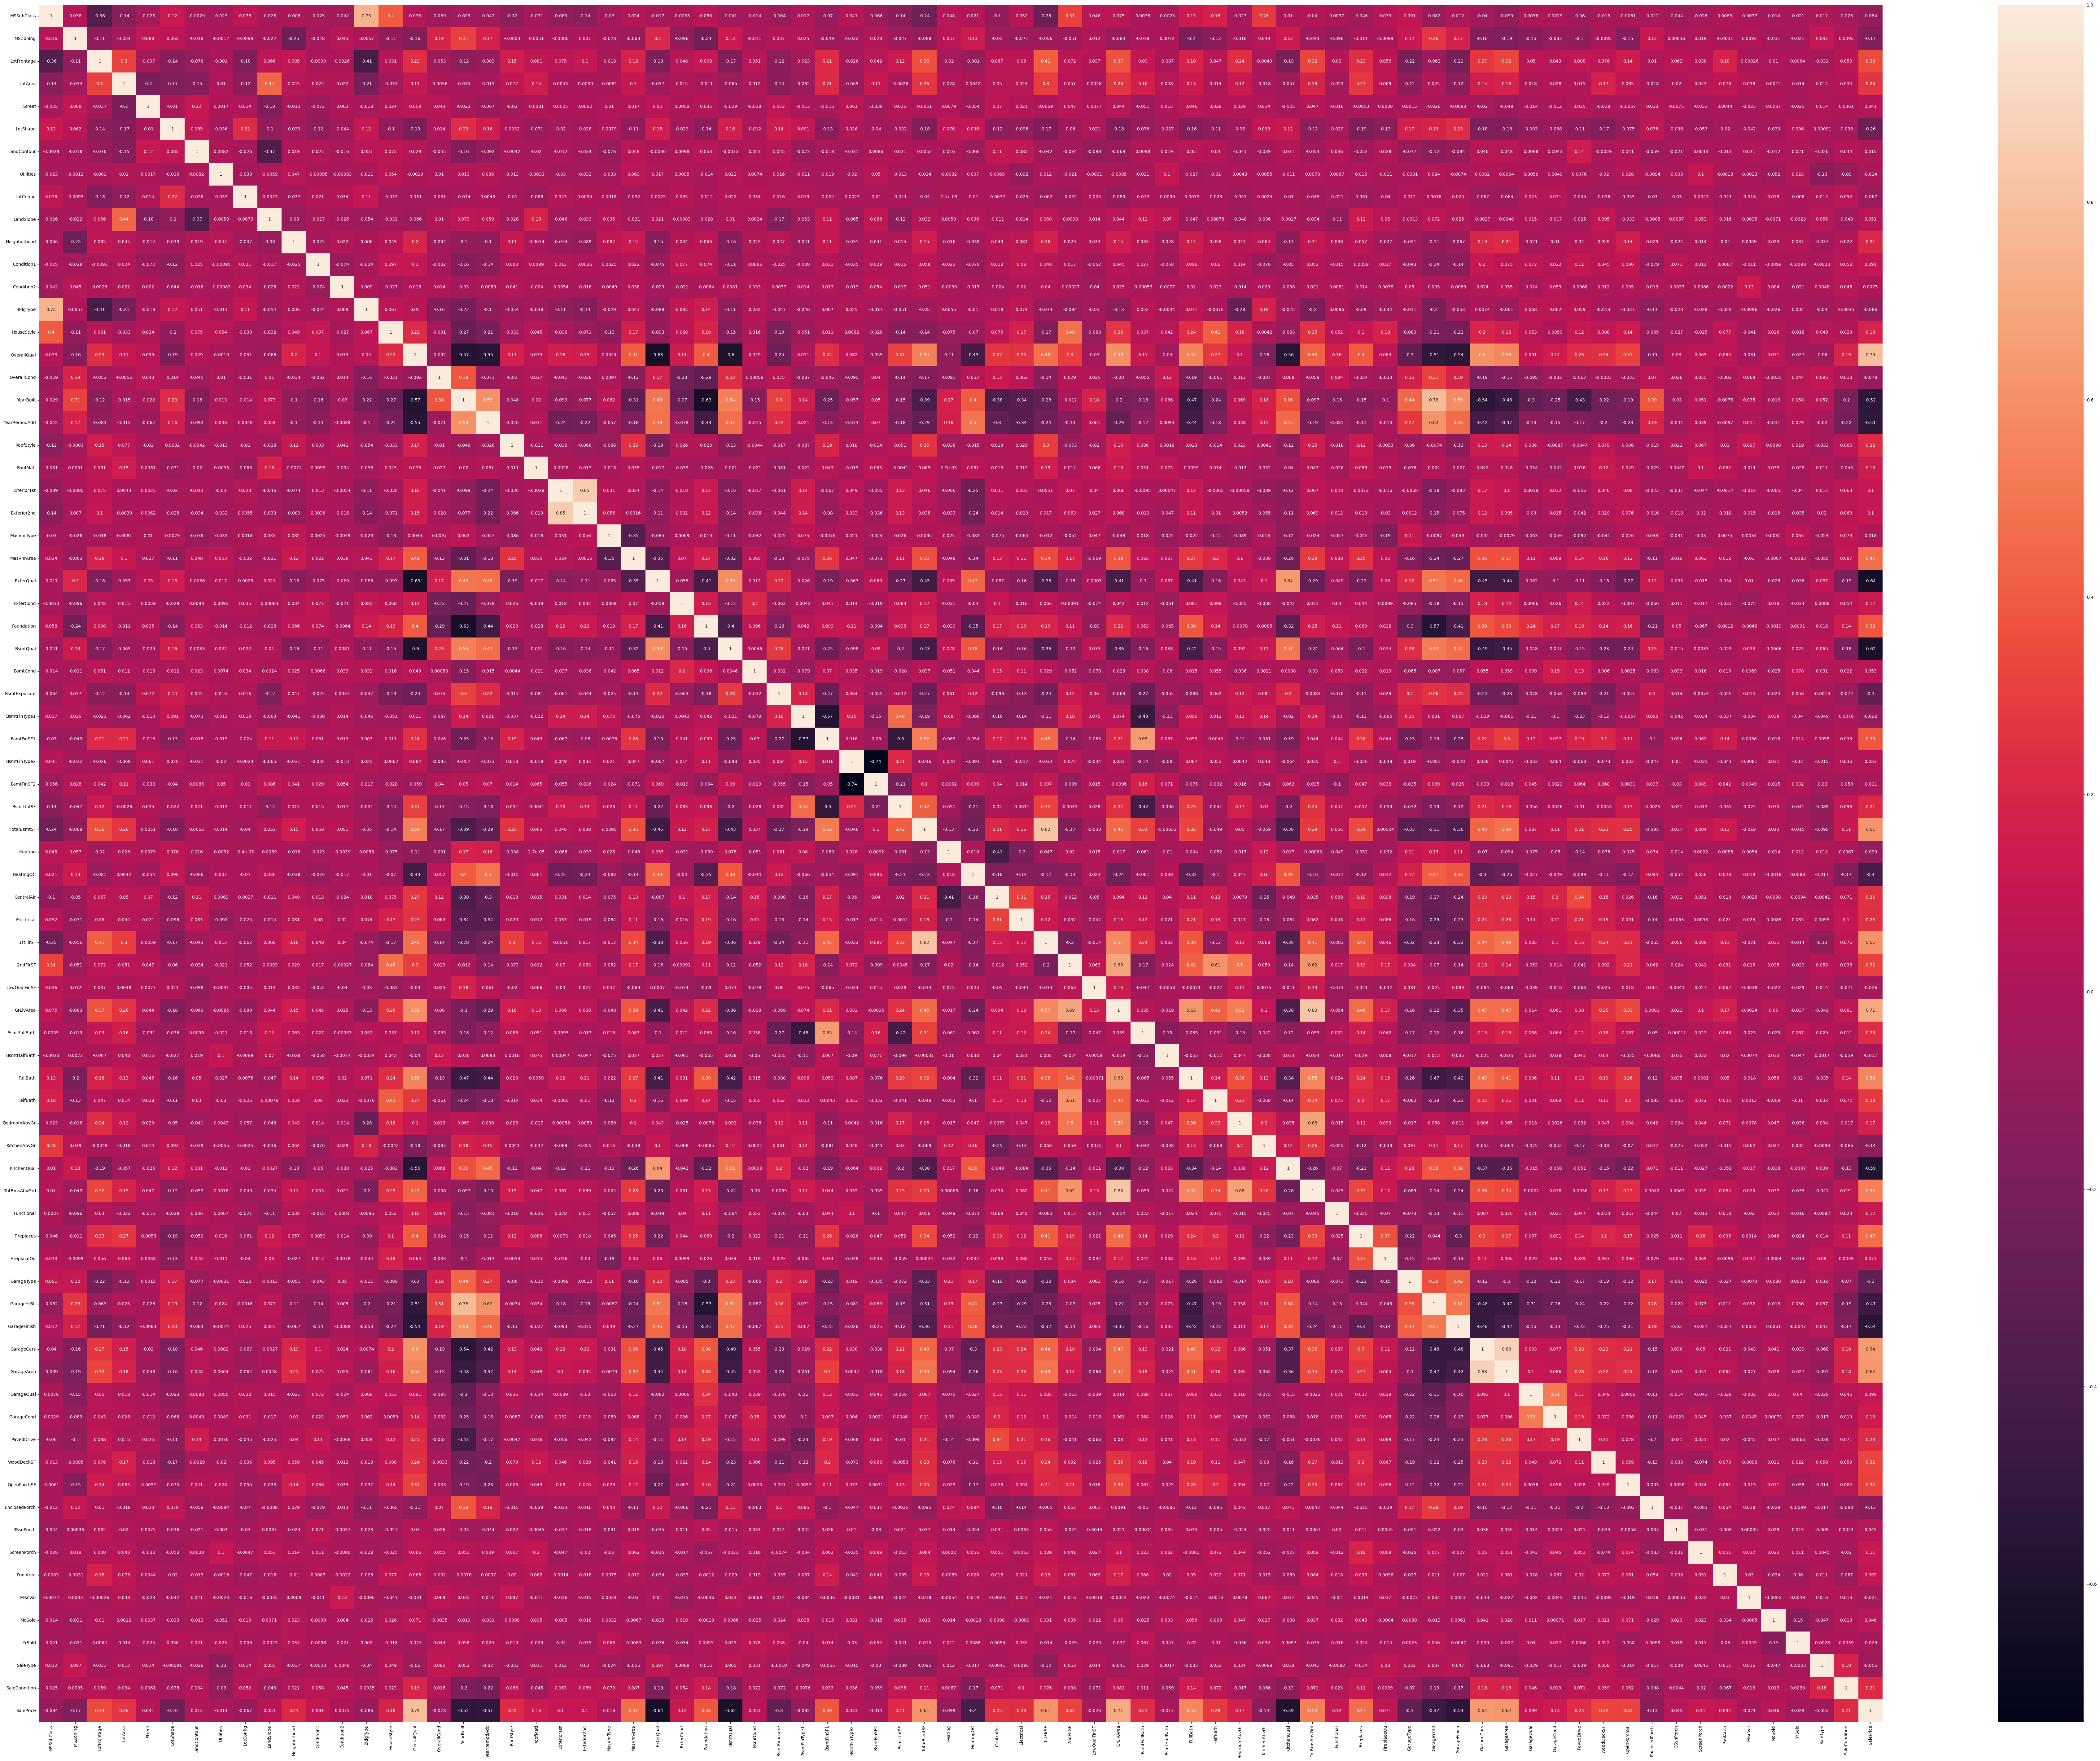

In [99]:
## checking correlation
fig=plt.gcf()
figsize=fig.get_size_inches()
fig.set_size_inches(figsize*15)
sns.heatmap(Preprocessed_data.corr(),annot=True)

In [100]:
#Dropping Highly Correlated variable
Preprocessed_data.drop(['GarageArea','Exterior1st'],axis=1,inplace=True)

In [101]:
Preprocessed_data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

# Build model

In [102]:
# split data into x and y
x=Preprocessed_data.drop('SalePrice',axis=1)
Y=Preprocessed_data.SalePrice

In [103]:
#log transformation
y=np.log(Y)

In [104]:
# training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=3)

In [105]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (1168, 73)
x_test (292, 73)
y_train (1168,)
y_test (292,)


# Insights
> Model Evaluation and Training: evaluating the model's performance on the test and train data and fine-tuning the model's parameters can improve the accuracy of the predictions.

## XG Boost

In [122]:
## Installing XGB library
!pip3 install xgboost

In [123]:
import xgboost

In [124]:
## model creation
from xgboost import XGBRegressor
xgb_r=XGBRegressor() 
xgb_r.fit(x_train,y_train)
y_hat=xgb_r.predict(x_test)

In [125]:
### Hyper parameter tuning

In [126]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the XGBoost model
xgb_model = xgb.XGBRegressor()

In [127]:
# Define the hyperparameters to tune
params = {
    "learning_rate": [0.05, 0.1, 0.15],
    "max_depth": [3, 5, 7],
    "subsample": [0.5, 0.7],
    "colsample_bytree": [0.5, 0.7],
    "n_estimators": [100, 500, 1000],
}

In [128]:
# Define the grid search object
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=params,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
)

In [129]:
# Fit the grid search object to the data
grid_search.fit(x, y)

# Print the best hyperparameters and the corresponding score
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Hyperparameters: {'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.7}
Best Score: -0.015043344555738903


In [155]:
XGB=XGBRegressor(colsample_bytree= 0.5, learning_rate= 0.05, max_depth= 3, n_estimators= 1000, subsample= 0.7)

In [156]:
XGB.fit(x_train,y_train)#training
y_hat=XGB.predict(x_test)#testing

In [157]:
## EVALUATION

In [158]:
r2_score(y_test,y_hat)

0.8965367515133866

In [159]:
adj=1-(1-0.89)*(292-1)/(292-74-1)
adj

0.8524884792626728

# insights
> Selecting the right machine learning algorithm that fits the data and the prediction problem is crucial. Linear regression, decision trees, Lasso regression,Hyperparameter Tuning and XGBoost algorithms we used for house price prediction.
> Among these algorithms XGBoost got best accuracy of 89% and rest all algorithms got below 85%.
> So we choosed XGBoost as a best algorithm for the house price prediction.